<a href="https://colab.research.google.com/github/Ssonamy/MADSU/blob/main/Lab%202.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2 Задания для самостоятельного выполнения:**

Импорт библиотек:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)
# /kaggle/input/the-boston-houseprice-data/boston.csv

Using Colab cache for faster access to the 'the-boston-houseprice-data' dataset.
Path to dataset files: /kaggle/input/the-boston-houseprice-data


# **1. С помощью pandas загрузите датасет для предсказания средней стоимости домов в Бостоне. Выведите его размеры.**
Указание: Данные можно скачать тут: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

Добавим датасет в переменную

In [6]:
data = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Выведем его размеры:

In [7]:
data.shape

(506, 14)

# **2. Постройте столбиковую диаграмму признака CHAS и по ней определите каких домов больше, с выходом к реке или без него.**
Указание: Используйте [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

Для признака CHAS посмотрим возможное количество вариантов, а также количество домов с этим признаком

In [8]:
data['CHAS'].value_counts()

,count
CHAS,
0,471
1,35


Как можно увидеть, всего два возможных варианта: с выходом к реке и без. Возьмем в качестве меток список возможных вариантов, а также массив с количеством домов с выходом к реке или же без него.

In [9]:
labels = data['CHAS'].value_counts().index.to_list()
values = data['CHAS'].value_counts().values

Построим столбиковую диаграмму, передав в неё эти значения.

<BarContainer object of 2 artists>

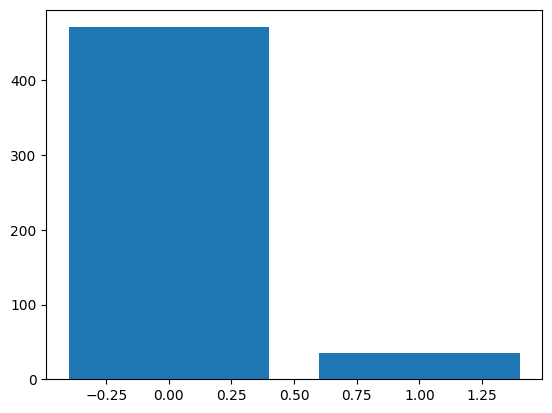

In [10]:
# plt.figure(figsize=(4, 3))
plt.bar(labels, values)

Исходя из данной диаграммы, можем увидеть, что болешнсво домов не имеют выхода к реке

# **З. Постройте гистограмму по целевой переменной MEDV. Оцените визуально, какую стоимость имеют наибольшее количество домов в датасете, а какую - наименьшее.**

Построим гистограмму признака MEDV:

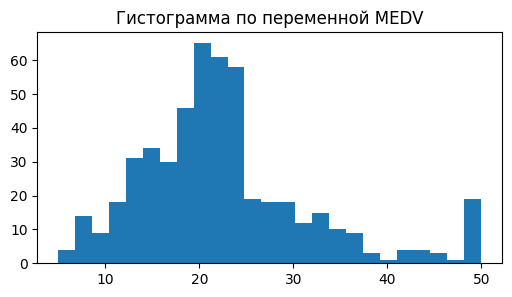

In [11]:
f = plt.figure(figsize=(6,3))
plt.title('Гистограмма по переменной MEDV', fontsize=12)
plt.hist(data['MEDV'], bins=25)
plt.show()

Наибольшее количество домов продается за 20 тысяч, а наименьшее за 40 тысяч

# **4. Постройте диаграммы рассеяния для признаков CRIM, ZN, RM, LSTAT в зависимости от целевой переменной MEDV в одной области figure. Оцените визуально, есть ли среди них такие, на которых разброс точек напоминает линейную зависимость**

Построим диаграммы рассеивания для указаных признаков

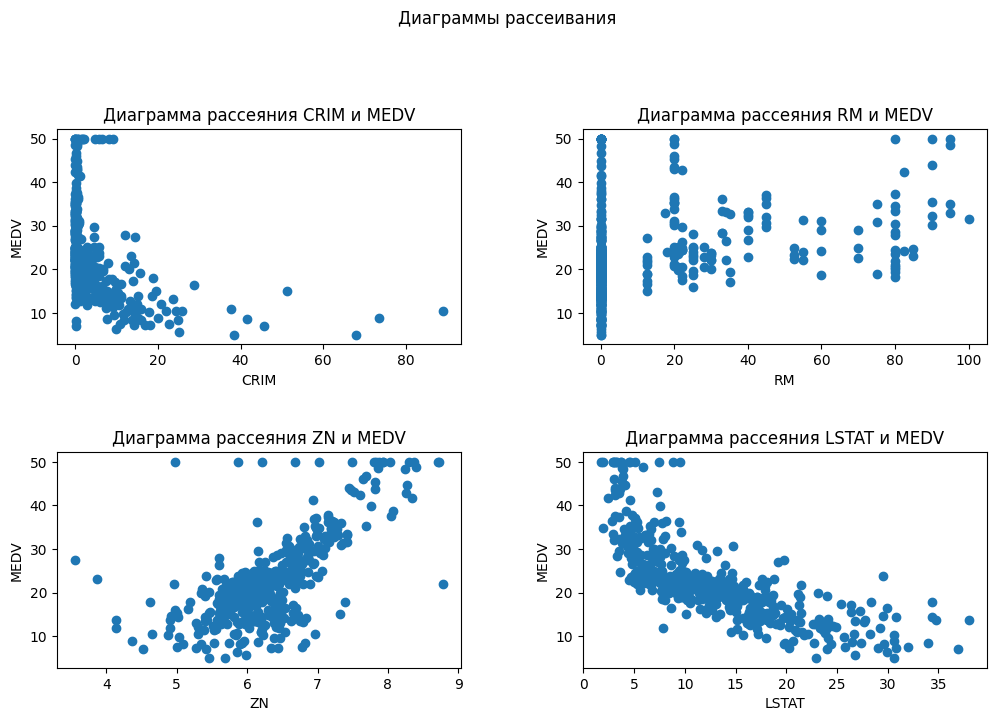

In [12]:
f, ax = plt.subplots(2,2,figsize=(12,7))

ax[0, 0].scatter(data['CRIM'], data['MEDV'])
ax[0, 0].set(title = "Диаграмма рассеяния CRIM и MEDV", xlabel='CRIM', ylabel='MEDV')

ax[0, 1].scatter(data['ZN'],   data['MEDV'])
ax[0, 1].set(title = 'Диаграмма рассеяния RM и MEDV', xlabel='RM', ylabel='MEDV')


ax[1, 0].scatter(data['RM'], data['MEDV'])
ax[1, 0].set(title = 'Диаграмма рассеяния ZN и MEDV', xlabel='ZN', ylabel='MEDV')


ax[1, 1].scatter(data['LSTAT'], data['MEDV'])
ax[1 ,1].set(title = 'Диаграмма рассеяния LSTAT и MEDV', xlabel='LSTAT', ylabel='MEDV')


f.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Диаграммы рассеивания', y = 1.05, fontsize=12)
plt.show()

Разброс точек на графиках мало напоминает линейную зависимость


# **5. Постройте ядерную оценку плотности целевой переменной MEDV. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной MEDV и признака RM, затем оцените визуально с каким средним количеством комнат и какой стоимости основная масса домов в датасете.**

Построим одномерную ядерную оценку плотности:

<Axes: title={'center': 'Ядерная оценка плотности целевой переменной MEDV'}, xlabel='MEDV', ylabel='Density'>

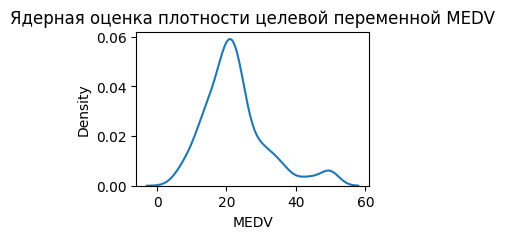

In [13]:
f = plt.figure(figsize=(3, 2))
plt.title('Ядерная оценка плотности целевой переменной MEDV', fontsize=12, y=1)
sns.kdeplot(data=data, x='MEDV')

На нормальное распределение похоже, но очень отдаленно

Построим двумерную ядерную оценку плотности:

<Axes: title={'center': 'Двумерная ядерная оценка плотности для целевой переменой\nMEDV и признака RM'}, xlabel='MEDV', ylabel='RM'>

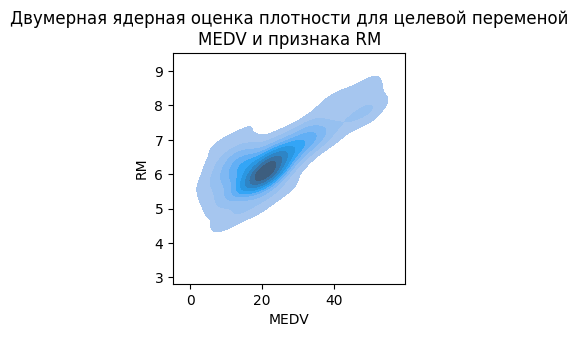

In [14]:
f = plt.figure(figsize=(3,3))
plt.title("Двумерная ядерная оценка плотности для целевой переменой\nMEDV и признака RM", fontsize = 12)
sns.kdeplot(data=data, x = 'MEDV', y = 'RM', fill = True)

Самое большое количество комнат в домах в датасете - 6, продаются по цене примерно от 18 до 23 тысяч

# **6. Постройте матрицу корреляции признаков на тепловой карте. По ней определите, какие признаки сильно скоррелированы.**

Матрица корреляции:

In [15]:
col = data.columns.to_list()
corr = data[col].corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Построим её на тепловой карте:

Text(0.5, 1.0, 'Тепловая карта матрицы корреляции')

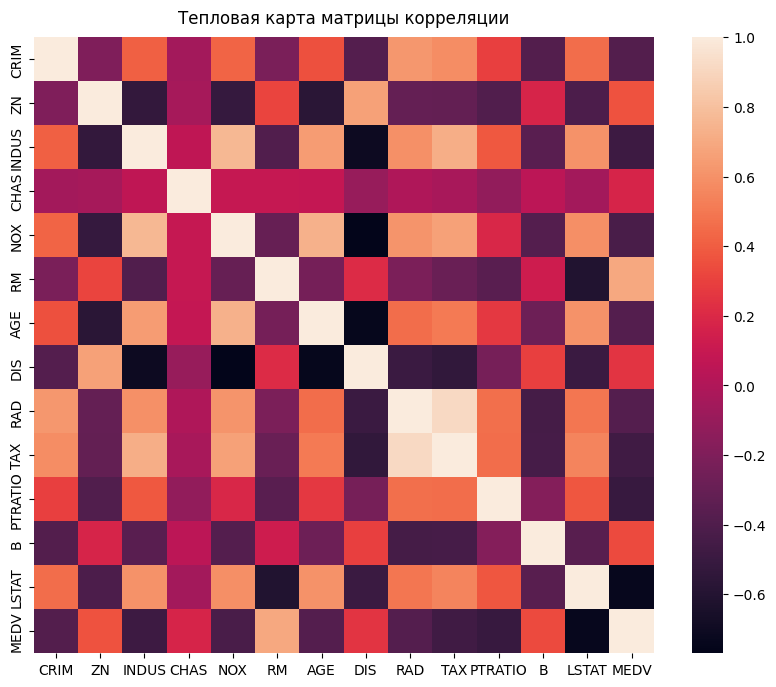

In [16]:
f = plt.figure(figsize=(10, 8))
sns.heatmap(corr)
plt.title('Тепловая карта матрицы корреляции', fontsize=12, pad=10)

Сделаем её более наглядной, задав значения параметров:

Text(0.5, 1.0, 'Тепловая карта матрицы корреляции')

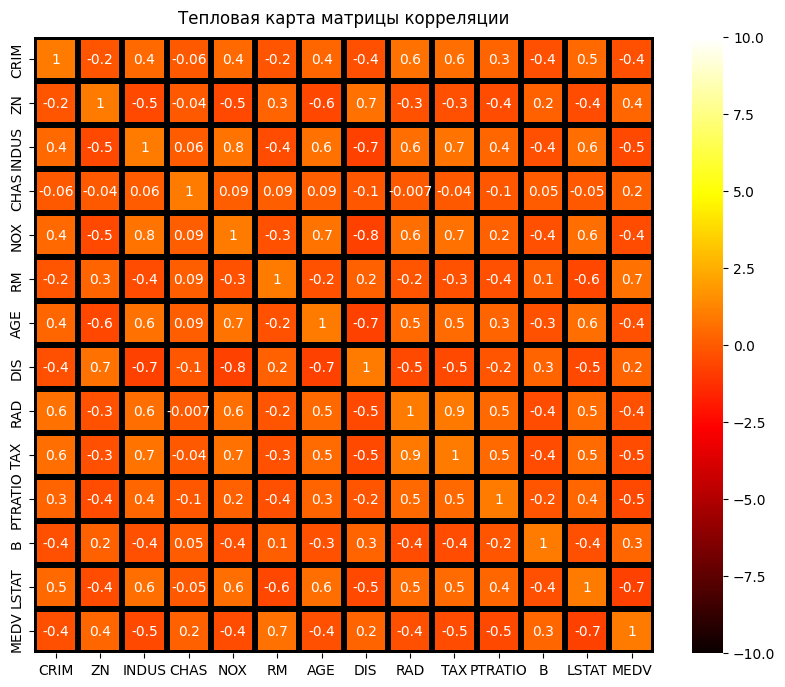

In [17]:
f = plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='hot', vmin=-10, vmax=10, center=0, linewidths=4, linecolor='black', cbar=True)
plt.title('Тепловая карта матрицы корреляции', fontsize=12, pad=10)

Сильная корреляция (r >= 0.7) прослеживается у пар ZN & DIS, INDUS & NOX, INDUS & TAX, NOX & AGE, NOX & TAX, RM & MEDV, RAD & TAX

# **7. Задайте квадратную область [—10; 10] × [0; 20] на плоскости сеткой точек 10 × 10. Визуализируйте полученную сетку на плоскости, используя диаграмму рассеивания.**

Создадим массив точек по X и Y


In [18]:
x = np.linspace(-10, 10, 10)   # 10 точек от -10 до 10
y = np.linspace(0, 20, 10)     # 10 точек от 0 до 20

Построим сетку и визуализируем:

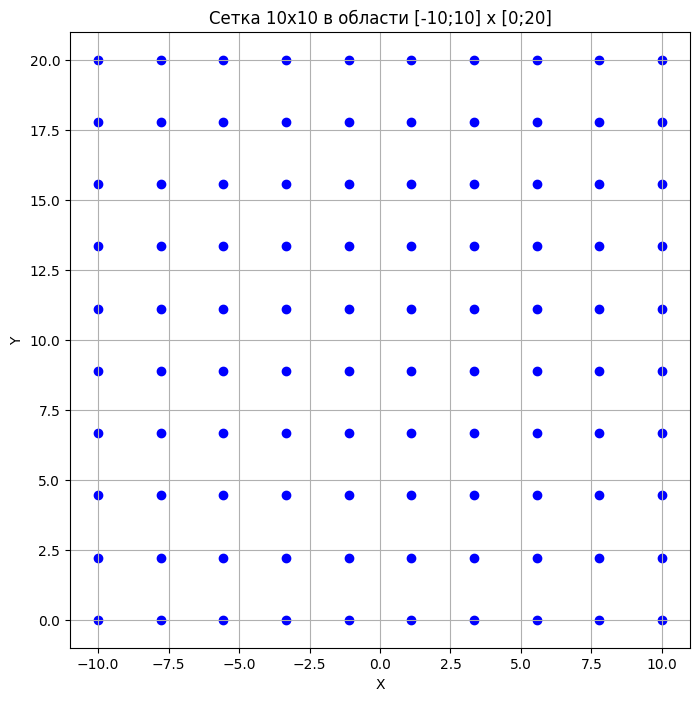

In [19]:
f = plt.figure(figsize=(8, 8))
X, Y = np.meshgrid(x, y)

plt.scatter(X, Y, c='blue', marker='o')
plt.title("Сетка 10x10 в области [-10;10] x [0;20]")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# **8. Постройте 3D-график функции z = x^2 + (y - 5)^2 + 4 на квадрате [−5; 5] × [0; 10], используя построенную сетку. Изобразите на графике и саму сетку.**
Указание: Для изображения сетки используйте метод [scatter](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

Запрограммируем функцию


In [20]:
def z(x, y):
  return (x**2) + ((y - 5)**2) +4

Зададим квадратную область на плоскости [−5; 5] × [0; 10] сеткой точек 100 × 100. Для построения сетки используем метод meshgreed библиотеки numpy.

In [21]:
N = 10
x = np.linspace(-5, 5, N)
y = np.linspace(0, 10, N)

x_grid, y_grid = np.meshgrid(x, y)

Найдём значения функции в точке

In [22]:
z_grid = z(x_grid, y_grid)

Построим поверхность по найденным точкам:

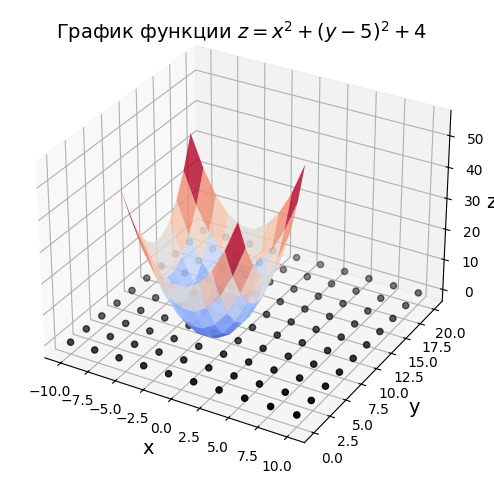

In [23]:
f = plt.figure(figsize = [8, 6])
ax = f.add_subplot(projection='3d') # Построение трехмерной системы координат

ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.8) # Построение поверхности
ax.scatter(X, Y, 0, color="black") # Отрисовка сетки

# Лучше, как я выяснил вместо 0 третим аргументом писать np.zeros_like(X_points),
# чтобы был массив той же размерности что и другие,
# только из нулей, но как можно видеть, и так всё работает

ax.set_title('График функции $z = x^2 + (y - 5)^2 + 4$', fontsize=14, y=1)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad=-1)

plt.show()

# **9. Постройте 3D-график функции z = x^2 + (y - 5)^2 + 4 на квадрате [-5; 5] × [0; 10], используя более мелкую сетку размера 100 × 100. Саму сетку изображать не нужно. Поменяйте угол обзора графика.**


Запрограммируем функцию


In [24]:
def z(x, y):
  return (x**2) + ((y - 5)**2) +4

Зададим квадратную область на плоскости [−5; 5] × [0; 10] сеткой точек 100 × 100. Для построения сетки используем метод meshgreed библиотеки numpy.

In [25]:
N = 100
x = np.linspace(-5, 5, N)
y = np.linspace(0, 10, N)

x_grid, y_grid = np.meshgrid(x, y)

Найдём значения функции в точке

In [26]:
z_grid = z(x_grid, y_grid)

Построим поверхность по найденным точкам:

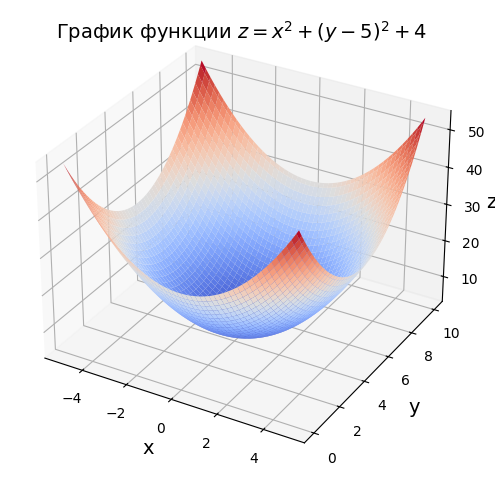

In [28]:
f = plt.figure(figsize = [8, 6])
ax = f.add_subplot(projection='3d') # Построение трехмерной системы координат

ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm') # Построение поверхности

ax.set_title('График функции $z = x^2 + (y - 5)^2 + 4$', fontsize=14, y=1)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad=-1)

plt.show()

Повернем график:

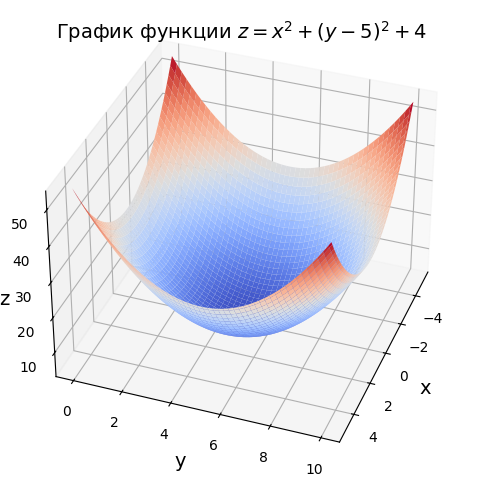

In [29]:
f = plt.figure(figsize=[8, 6])
ax = f.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.view_init(elev=35, azim=20) # Поворот графика

ax.set_title('График функции $z = x^2 + (y - 5)^2 + 4$', fontsize=14, y=1)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad= -1)

plt.show()

# **10. Постройте на одном 3D-графике функцию z = x^2 + (y - 5)^2 + 4 на квадрате [-5; 5] × [0; 10] и её линии уровня.**
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha = 0.5.




Для построения линий уровня используем метод contour библиотеки matplotlib.

/tmp/ipython-input-1717082946.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm', color='black', levels=30) # Построение линий уровня


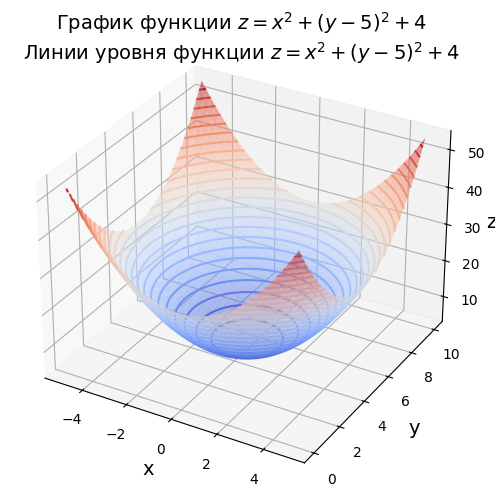

In [33]:
f = plt.figure(figsize = [8, 6])
ax = f.add_subplot(projection='3d') # Построение трехмерной системы координат

ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha = 0.5) # Построение поверхности
ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm', color='black', levels=30) # Построение линий уровня

ax.set_title('График функции $z = x^2 + (y - 5)^2 + 4$\nЛинии уровня функции $z = x^2 + (y - 5)^2 + 4$', fontsize=14, y=1)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad=-1)

plt.show()